In [1]:
import numpy as np
import rdkit
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from molreps.graph import MolGraph
import networkx as nx
from molreps.methods.mol_py3d import MolTo3DView

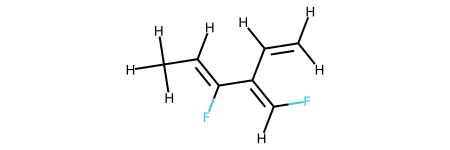

In [2]:
smile = "C\C=C(/F)\C(=C\F)\C=C"
# smile = 'CC(C)(C)NC[C@@H](C1=CC(=C(C=C1)O)CO)O'
m = rdkit.Chem.MolFromSmiles(smile)
m = rdkit.Chem.AddHs(m) # add H's to the molecule
# rdkit.Chem.AssignStereochemistry(m) # Assign Stereochemistry
rdkit.Chem.FindPotentialStereo(m) # Assign Stereochemistry new method
m

In [3]:
# If no coordinates are known, do embedding with rdkit
AllChem.EmbedMolecule(m)
AllChem.MMFFOptimizeMolecule(m)
MolTo3DView(m)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [4]:
# Preimplemented features
mgraph = MolGraph(m)
mgraph._mols_implemented

{'rdkit': {'nodes': ['AtomicNum',
   'Symbol',
   'NumExplicitHs',
   'NumImplicitHs',
   'IsAromatic',
   'TotalDegree',
   'TotalValence',
   'Mass',
   'IsInRing',
   'Hybridization',
   'ChiralTag',
   'FormalCharge',
   'ImplicitValence',
   'NumRadicalElectrons'],
  'edges': ['BondType',
   'IsAromatic',
   'IsConjugated',
   'IsInRing',
   'Stereo',
   'Distance'],
  'state': ['NumAtoms', 'ExactMolWt']}}

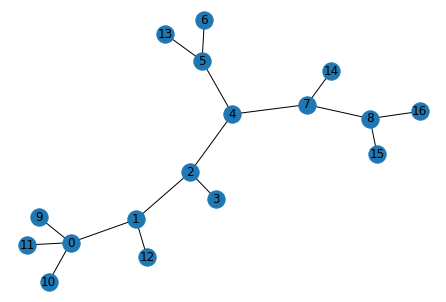

In [15]:
mgraph.make(nodes=['AtomicNum','TotalValence','ChiralTag','Hybridization','NumRadicalElectrons'], 
            edges=['BondType','Distance','Stereo','IsInRing'],
            state=['NumAtoms'])
nx.draw(mgraph,with_labels=True)

In [17]:
mgraph.edges.data()

EdgeDataView([(0, 1, {'BondType': rdkit.Chem.rdchem.BondType.SINGLE, 'Distance': 1.4931292518563004, 'Stereo': rdkit.Chem.rdchem.BondStereo.STEREONONE, 'IsInRing': False}), (0, 9, {'BondType': rdkit.Chem.rdchem.BondType.SINGLE, 'Distance': 1.0941981755708317, 'Stereo': rdkit.Chem.rdchem.BondStereo.STEREONONE, 'IsInRing': False}), (0, 10, {'BondType': rdkit.Chem.rdchem.BondType.SINGLE, 'Distance': 1.0943188121661989, 'Stereo': rdkit.Chem.rdchem.BondStereo.STEREONONE, 'IsInRing': False}), (0, 11, {'BondType': rdkit.Chem.rdchem.BondType.SINGLE, 'Distance': 1.0943366656152493, 'Stereo': rdkit.Chem.rdchem.BondStereo.STEREONONE, 'IsInRing': False}), (1, 2, {'BondType': rdkit.Chem.rdchem.BondType.DOUBLE, 'Distance': 1.3415068367902407, 'Stereo': rdkit.Chem.rdchem.BondStereo.STEREOZ, 'IsInRing': False}), (1, 12, {'BondType': rdkit.Chem.rdchem.BondType.SINGLE, 'Distance': 1.086462802780352, 'Stereo': rdkit.Chem.rdchem.BondStereo.STEREONONE, 'IsInRing': False}), (2, 3, {'BondType': rdkit.Chem.rd

In [16]:
mgraph.nodes.data()

NodeDataView({0: {'AtomicNum': 6, 'TotalValence': 4, 'ChiralTag': rdkit.Chem.rdchem.ChiralType.CHI_UNSPECIFIED, 'Hybridization': rdkit.Chem.rdchem.HybridizationType.SP3, 'NumRadicalElectrons': 0}, 1: {'AtomicNum': 6, 'TotalValence': 4, 'ChiralTag': rdkit.Chem.rdchem.ChiralType.CHI_UNSPECIFIED, 'Hybridization': rdkit.Chem.rdchem.HybridizationType.SP2, 'NumRadicalElectrons': 0}, 2: {'AtomicNum': 6, 'TotalValence': 4, 'ChiralTag': rdkit.Chem.rdchem.ChiralType.CHI_UNSPECIFIED, 'Hybridization': rdkit.Chem.rdchem.HybridizationType.SP2, 'NumRadicalElectrons': 0}, 3: {'AtomicNum': 9, 'TotalValence': 1, 'ChiralTag': rdkit.Chem.rdchem.ChiralType.CHI_UNSPECIFIED, 'Hybridization': rdkit.Chem.rdchem.HybridizationType.SP3, 'NumRadicalElectrons': 0}, 4: {'AtomicNum': 6, 'TotalValence': 4, 'ChiralTag': rdkit.Chem.rdchem.ChiralType.CHI_UNSPECIFIED, 'Hybridization': rdkit.Chem.rdchem.HybridizationType.SP2, 'NumRadicalElectrons': 0}, 5: {'AtomicNum': 6, 'TotalValence': 4, 'ChiralTag': rdkit.Chem.rdchem.C

In [18]:
mgraph._graph_state

{'NumAtoms': 17}

In [19]:
graph_tensors = mgraph.to_tensor(nodes=['AtomicNum','TotalValence','ChiralTag','Hybridization','NumRadicalElectrons'], 
                                edges=['BondType','Distance','Stereo','IsInRing'],
                                state=['NumAtoms'])
graph_tensors['nodes']

array([[6, 4, 0, 4, 0],
       [6, 4, 0, 3, 0],
       [6, 4, 0, 3, 0],
       [9, 1, 0, 4, 0],
       [6, 4, 0, 3, 0],
       [6, 4, 0, 3, 0],
       [9, 1, 0, 4, 0],
       [6, 4, 0, 3, 0],
       [6, 4, 0, 3, 0],
       [1, 1, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [1, 1, 0, 0, 0]])

In [10]:
graph_tensors['edges']

array([[1.        , 1.49312925, 0.        , 0.        ],
       [1.        , 1.09419818, 0.        , 0.        ],
       [1.        , 1.09431881, 0.        , 0.        ],
       [1.        , 1.09433667, 0.        , 0.        ],
       [2.        , 1.34150684, 2.        , 0.        ],
       [1.        , 1.0864628 , 0.        , 0.        ],
       [1.        , 1.49312925, 0.        , 0.        ],
       [1.        , 1.35462183, 0.        , 0.        ],
       [1.        , 1.46230076, 0.        , 0.        ],
       [2.        , 1.34150684, 2.        , 0.        ],
       [1.        , 1.35462183, 0.        , 0.        ],
       [2.        , 1.34304314, 3.        , 0.        ],
       [1.        , 1.46230076, 0.        , 0.        ],
       [1.        , 1.46232561, 0.        , 0.        ],
       [1.        , 1.08151671, 0.        , 0.        ],
       [2.        , 1.34304314, 3.        , 0.        ],
       [1.        , 1.34805852, 0.        , 0.        ],
       [1.        , 1.34805852,

In [11]:
graph_tensors['indices']

array([[ 0,  1],
       [ 0,  9],
       [ 0, 10],
       [ 0, 11],
       [ 1,  2],
       [ 1, 12],
       [ 1,  0],
       [ 2,  3],
       [ 2,  4],
       [ 2,  1],
       [ 3,  2],
       [ 4,  5],
       [ 4,  2],
       [ 4,  7],
       [ 5, 13],
       [ 5,  4],
       [ 5,  6],
       [ 6,  5],
       [ 7,  8],
       [ 7, 14],
       [ 7,  4],
       [ 8,  7],
       [ 8, 16],
       [ 8, 15],
       [ 9,  0],
       [10,  0],
       [11,  0],
       [12,  1],
       [13,  5],
       [14,  7],
       [15,  8],
       [16,  8]])

In [12]:
graph_tensors['adjacency']

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
        0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0.],
       [0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
        1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [13]:
graph_tensors['state']

array([17])